**Os dados, até a data do presente estudo, estão em https://saude-ibgedgc.hub.arcgis.com/datasets/2dfd385e7ded49c6b7f7929911806a20_2**

**O presente arquivo é de terça, 27 de junho de 2020.**

Dupla: 
Carolina Margiotti de Abreu e Leonardo de Souza Augusto

**Disclaimer/Aviso Legal: Este notebook tem um fim único e exclusivamente didático para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.**

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker
from datetime import datetime
import folium
from folium import plugins
from folium.plugins import HeatMap
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'Polos de atendimento de saude (baixa e média complexidade) (27.06.2020).csv'
df = pd.read_csv(filename, delimiter=',', 
                 encoding='utf8',
                 error_bad_lines=False)

In [3]:
df.shape

(909, 8)

In [4]:
for k in range(0,len(df.columns)): print (k, df.columns[k])

0 X
1 Y
2 OBJECTID
3 Geocodigo
4 Municipio
5 Municipio_ou_referencia_arranjo
6 Polos_de_Alta_Complexidade
7 Polos_Baixa_media_complexidade


In [5]:
df.sample(100)

,X,Y,OBJECTID,Geocodigo,Municipio,Municipio_ou_referencia_arranjo,Polos_de_Alta_Complexidade,Polos_Baixa_media_complexidade
374,-50.193551,-19.727241,375,3134400,ITURAMA,ITURAMA,NaN,polo de baixa e media complexidade de serviços...
480,-43.709385,-22.609727,481,3303609,PARACAMBI,PARACAMBI,NaN,subpolo de baixa e media complexidade de servi...
123,-42.247112,-8.359310,124,2210003,SAO JOAO DO PIAUI,SAO JOAO DO PIAUI,NaN,polo de baixa e media complexidade de serviços...
635,-52.612300,-23.654400,636,4105508,CIANORTE,CIANORTE,Polo de alta complexidade de serviços de saúde,polo de baixa e media complexidade de serviços...
479,-43.450345,-22.759835,480,3303500,NOVA IGUACU,NOVA IGUACU,Subpolo de alta complexidade de serviços de saúde,subpolo de baixa e media complexidade de servi...
...,...,...,...,...,...,...,...,...
114,-42.372352,-3.459759,115,2205805,LUZILANDIA,LUZILANDIA,NaN,polo de baixa e media complexidade de serviços...
801,-54.264143,-28.301938,802,4317509,SANTO ANGELO,SANTO ANGELO,Polo de alta complexidade de serviços de saúde,polo de baixa e media complexidade de serviços...
84,-47.490060,-5.527317,85,2105302,IMPERATRIZ,IMPERATRIZ,Polo de alta complexidade de serviços de saúde,polo de baixa e media complexidade de serviços...
557,-51.439737,-21.512164,558,3526001,JUNQUEIROPOLIS,JUNQUEIROPOLIS,NaN,polo de baixa e media complexidade de serviços...


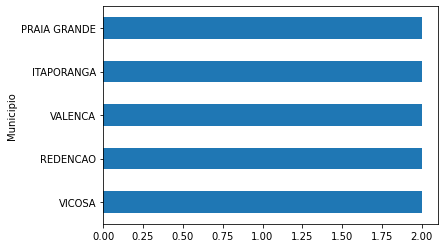

In [6]:
df.groupby('Municipio').size().sort_values().tail(5).plot(kind='barh')

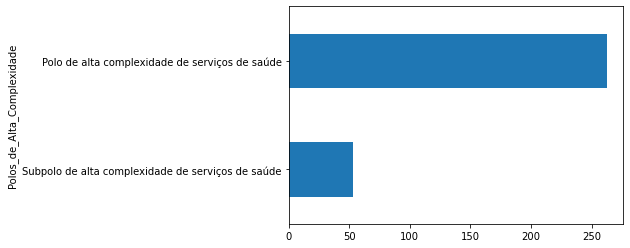

In [7]:
df.groupby('Polos_de_Alta_Complexidade').size().sort_values().tail(5).plot(kind='barh')

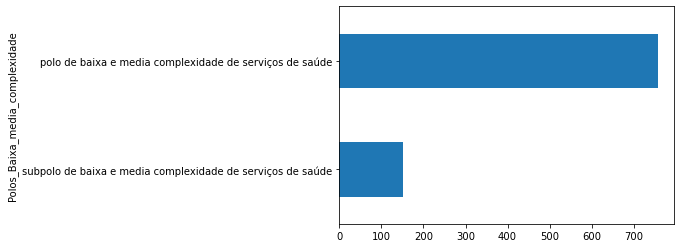

In [8]:
df.groupby('Polos_Baixa_media_complexidade').size().sort_values().tail(5).plot(kind='barh')

In [9]:
df.groupby('Municipio').size().sort_values()

Municipio
ABAETE            1
PATROCINIO        1
PAU DOS FERROS    1
PAULISTANA        1
PAULO AFONSO      1
                 ..
VICOSA            2
REDENCAO          2
VALENCA           2
ITAPORANGA        2
PRAIA GRANDE      2
Length: 901, dtype: int64

In [10]:

df.groupby('Polos_de_Alta_Complexidade').size().sort_values()

Polos_de_Alta_Complexidade
Subpolo de alta complexidade de serviços de saúde     53
Polo de alta complexidade de serviços de saúde       263
dtype: int64

In [11]:
df.groupby('Polos_Baixa_media_complexidade').size().sort_values()

Polos_Baixa_media_complexidade
subpolo de baixa e media complexidade de serviços de saúde    151
polo de baixa e media complexidade de serviços de saúde       758
dtype: int64

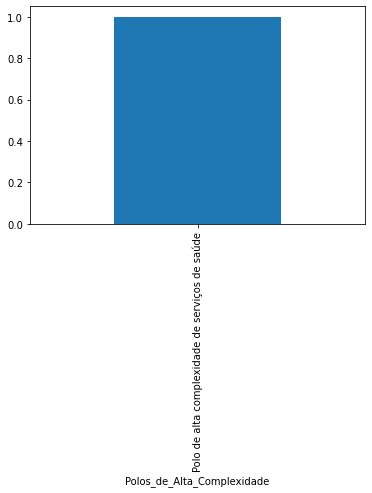

In [12]:
df.query('Municipio == "SAO JOSE DOS CAMPOS"').groupby('Polos_de_Alta_Complexidade').size().plot(kind='bar')